In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy import fft
import random
import pywt.data
from PIL import Image
import pandas as pd
import seaborn as sns
import os
import pickle

In [2]:
np.array(Image.open(file_list[k])).shape

NameError: name 'file_list' is not defined

In [3]:
# assign directory
ROOT_DIR = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
data_dir = ROOT_DIR + 'Data/Panoptic Argiculture 2/Toy dataset - Near Infra Red'
 
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]
file_names = os.listdir(data_dir)

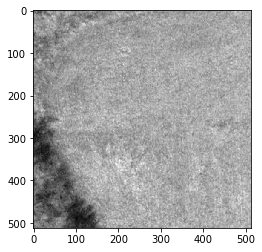

In [4]:
image = Image.open(file_list[0]).convert('L')
std= np.std(image)
mean = np.mean(image)
image = (image- mean)/std
plt.imshow(image, interpolation="nearest", cmap=plt.cm.gray)

In [5]:
image_converted= np.array(fft.fft2(image))

In [6]:
x_freqs = fft.fftfreq(image.shape[0])
y_freqs = fft.fftfreq(image.shape[1])
coord_df = pd.DataFrame()
coord_df["index_coords"] = [(x,y) for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
coord_df["x_index"] = [x for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
coord_df["y_index"] = [y for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
coord_df["x_freq"] = [x_freqs[x] for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
coord_df["y_freq"] = [y_freqs[y] for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
coord_df["magnitude"] = np.sqrt(coord_df["x_freq"] ** 2 + coord_df["y_freq"] **2)
coord_df = coord_df.set_index(["index_coords"])
coord_df = coord_df[(coord_df["x_freq"] >= 0 )& (coord_df["y_freq"] >= 0)]
coord_df

,x_index,y_index,x_freq,y_freq,magnitude
index_coords,,,,,
"(0, 0)",0,0,0.000000,0.000000,0.000000
"(0, 1)",0,1,0.000000,0.001953,0.001953
"(0, 2)",0,2,0.000000,0.003906,0.003906
"(0, 3)",0,3,0.000000,0.005859,0.005859
"(0, 4)",0,4,0.000000,0.007812,0.007812
...,...,...,...,...,...
"(255, 251)",255,251,0.498047,0.490234,0.698842
"(255, 252)",255,252,0.498047,0.492188,0.700214
"(255, 253)",255,253,0.498047,0.494141,0.701588


In [58]:
def getIndexDF(image):
    x_freqs = fft.fftfreq(image.shape[0])
    y_freqs = fft.fftfreq(image.shape[1])
    coord_df = pd.DataFrame()
    coord_df["index_coords"] = [(x,y) for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["x_index"] = [x for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["y_index"] = [y for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["x_freq"] = [x_freqs[x] for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["y_freq"] = [y_freqs[y] for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["magnitude"] = np.sqrt(coord_df["x_freq"] ** 2 + coord_df["y_freq"] **2)
    coord_df = coord_df.set_index(["index_coords"])
    coord_df = coord_df[(coord_df["x_freq"] >= 0 )& (coord_df["y_freq"] >= 0)]
    return coord_df
getIndexDF(image)

,x_index,y_index,x_freq,y_freq,magnitude
index_coords,,,,,
"(0, 0)",0,0,0.000000,0.000000,0.000000
"(0, 1)",0,1,0.000000,0.001953,0.001953
"(0, 2)",0,2,0.000000,0.003906,0.003906
"(0, 3)",0,3,0.000000,0.005859,0.005859
"(0, 4)",0,4,0.000000,0.007812,0.007812
...,...,...,...,...,...
"(255, 251)",255,251,0.498047,0.490234,0.698842
"(255, 252)",255,252,0.498047,0.492188,0.700214
"(255, 253)",255,253,0.498047,0.494141,0.701588


In [54]:
coord_df

,x_index,y_index,x_freq,y_freq,magnitude
index_coords,,,,,
"(0, 1)",0,1,0.000000,0.001953,0.001953
"(0, 2)",0,2,0.000000,0.003906,0.003906
"(0, 3)",0,3,0.000000,0.005859,0.005859
"(0, 4)",0,4,0.000000,0.007812,0.007812
"(0, 5)",0,5,0.000000,0.009766,0.009766
...,...,...,...,...,...
"(255, 251)",255,251,0.498047,0.490234,0.698842
"(255, 252)",255,252,0.498047,0.492188,0.700214
"(255, 253)",255,253,0.498047,0.494141,0.701588


In [30]:
fft.fft2(np.ones([256, 256]))
fft.fftfreq(256, d=1)[125:130]

array([ 0.48828125,  0.4921875 ,  0.49609375, -0.5       , -0.49609375])

In [60]:
k = 7
max_mag = max(coord_df["magnitude"].to_numpy())
cuttoffs = np.linspace(0, max_mag, k+1)
cuttoffs[-1] += 0.0001
filtered = coord_df[(coord_df["magnitude"] >= cuttoffs[0] )&  (coord_df["magnitude"] < cuttoffs[1])]
filtered

,x_index,y_index,x_freq,y_freq,magnitude
index_coords,,,,,
"(0, 0)",0,0,0.000000,0.000000,0.000000
"(0, 1)",0,1,0.000000,0.001953,0.001953
"(0, 2)",0,2,0.000000,0.003906,0.003906
"(0, 3)",0,3,0.000000,0.005859,0.005859
"(0, 4)",0,4,0.000000,0.007812,0.007812
...,...,...,...,...,...
"(51, 3)",51,3,0.099609,0.005859,0.099782
"(51, 4)",51,4,0.099609,0.007812,0.099915
"(51, 5)",51,5,0.099609,0.009766,0.100087


In [21]:
filtered = coord_df[(coord_df["magnitude"] >= cuttoffs[0] )&  (coord_df["magnitude"] < cuttoffs[1])]
x = filtered["x_index"].to_numpy()
y = filtered["y_index"].to_numpy()

In [63]:
image_converted[tuple(x), tuple(y)]

array([ 9.82806181-0.56820901j,  4.24925985-0.70729897j,
       -8.04803963-5.36730277j, ..., -1.54649917+4.01302114j,
       -0.40676393-3.07071234j,  7.15757682-5.37672805j])

In [72]:
coord_arr = []
for j in range(k):
    filtered = coord_df[(coord_df["magnitude"] >= cuttoffs[j] )&  (coord_df["magnitude"] < cuttoffs[j+1])]
    x = filtered["x_index"].to_numpy()
    y = filtered["y_index"].to_numpy()
    coord_arr.append([tuple(x),tuple(y)])
coord_arr

[[(0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3

In [23]:
range(k)[6]

6

In [24]:
coord_df_copy = coord_df.copy()
coord_df_copy

,x_index,y_index,x_freq,y_freq,magnitude
index_coords,,,,,
"(0, 1)",0,1,0.000000,0.001953,0.001953
"(0, 2)",0,2,0.000000,0.003906,0.003906
"(0, 3)",0,3,0.000000,0.005859,0.005859
"(0, 4)",0,4,0.000000,0.007812,0.007812
"(0, 5)",0,5,0.000000,0.009766,0.009766
...,...,...,...,...,...
"(255, 251)",255,251,0.498047,0.490234,0.698842
"(255, 252)",255,252,0.498047,0.492188,0.700214
"(255, 253)",255,253,0.498047,0.494141,0.701588


In [78]:
grey_scale_only = False
df = pd.DataFrame(columns=["Image ID", "Band", "Channel", "Data"])
    
coord_arr = []
for j in range(k):
    filtered = coord_df[(coord_df["magnitude"] >= cuttoffs[j] )&  (coord_df["magnitude"] < cuttoffs[j+1])]
    x = filtered["x_index"].to_numpy()
    y = filtered["y_index"].to_numpy()
    coord_arr.append([tuple(x),tuple(y)])

if grey_scale_only == True:
        colors_id = [3]
else:
    colors_id = np.arange(3)
colors = ["Red", "Green", "Blue", "Gray"]
#Fill DF DICT
print(len(file_list))
coord_copy = coord_df.copy()

for i in range(len(file_list)):
    name = file_names[i].split(".")[0]
    for c in colors_id:
        if c == 3:
            image = Image.open(file_list[k]).convert('L')
        else:
            image = Image.open(file_list[k]).convert('L')
       
        image = np.array(image)
        
        transformed = np.array(fft.fft2(image))
        for j in range(k):
            x_ind,y_ind = coord_arr[j]
            df.loc[len(df.index)] = [name, j+1,colors[c], transformed[y_ind, x_ind]]
    
    

1008


In [79]:
df

,Image ID,Band,Channel,Data
0,1LVU94MUU_4909-9397-5421-9909,1,Red,"[(17732877-0j), (-31212.458174498654-145850.07..."
1,1LVU94MUU_4909-9397-5421-9909,2,Red,"[(43292.832984608685-38345.493517273295j), (-5..."
2,1LVU94MUU_4909-9397-5421-9909,3,Red,"[(-238.50297010158147-3716.2170312996186j), (-..."
3,1LVU94MUU_4909-9397-5421-9909,4,Red,"[(-3587.6421484111543+2104.947692594838j), (20..."
4,1LVU94MUU_4909-9397-5421-9909,5,Red,"[(-481.1417235068475+747.407536172459j), (-503..."
...,...,...,...,...
21163,1J1YDIPXC_5940-6746-6452-7258,3,Blue,"[(-238.50297010158147-3716.2170312996186j), (-..."
21164,1J1YDIPXC_5940-6746-6452-7258,4,Blue,"[(-3587.6421484111543+2104.947692594838j), (20..."
21165,1J1YDIPXC_5940-6746-6452-7258,5,Blue,"[(-481.1417235068475+747.407536172459j), (-503..."
21166,1J1YDIPXC_5940-6746-6452-7258,6,Blue,"[(1612.842231483637-1017.648974595355j), (-548..."


In [80]:
def getIndexDF(image):
    x_freqs = fft.fftfreq(image.shape[0])
    y_freqs = fft.fftfreq(image.shape[1])
    coord_df = pd.DataFrame()
    coord_df["index_coords"] = [(x,y) for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["x_index"] = [x for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["y_index"] = [y for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["x_freq"] = [x_freqs[x] for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["y_freq"] = [y_freqs[y] for x in np.arange(image.shape[0]) for y in np.arange(image.shape[0])]
    coord_df["magnitude"] = np.sqrt(coord_df["x_freq"] ** 2 + coord_df["y_freq"] **2)
    coord_df = coord_df.set_index(["index_coords"])
    coord_df = coord_df[(coord_df["x_freq"] >= 0 )& (coord_df["y_freq"] >= 0)]
    return coord_df
getIndexDF(image)

,x_index,y_index,x_freq,y_freq,magnitude
index_coords,,,,,
"(0, 0)",0,0,0.000000,0.000000,0.000000
"(0, 1)",0,1,0.000000,0.001953,0.001953
"(0, 2)",0,2,0.000000,0.003906,0.003906
"(0, 3)",0,3,0.000000,0.005859,0.005859
"(0, 4)",0,4,0.000000,0.007812,0.007812
...,...,...,...,...,...
"(255, 251)",255,251,0.498047,0.490234,0.698842
"(255, 252)",255,252,0.498047,0.492188,0.700214
"(255, 253)",255,253,0.498047,0.494141,0.701588


In [72]:
def convert_to_fourier_basis(folder_dir, k):
    file_list = [os.path.join(folder_dir, filename) for filename in os.listdir(folder_dir)]
    file_names = os.listdir(folder_dir)
    
    image = Image.open(file_list[0]).convert('L')
    coord_df = getIndexDF(image)
    max_mag = max(coord_df["magnitude"].to_numpy())
    cuttoffs = np.linspace(0, max_mag, k+1)
    cuttoffs[-1] += 0.0001
    

    df = pd.DataFrame(columns=["Image ID", "Band", "Data"])
    coord_arr = []
    for j in range(k):
        filtered = coord_df[(coord_df["magnitude"] >= cuttoffs[j] )&  (coord_df["magnitude"] < cuttoffs[j+1])]
        x = filtered["x_index"].to_numpy()
        y = filtered["y_index"].to_numpy()
        coord_arr.append([x,y])
    
    #Fill DF DICT
    for i in range(len(file_list)):
        image = Image.open(file_list[k]).convert('L')
        image = np.array(image)
        name = file_names[k].split(".")[0]
        transformed = fft.fft2(image)
        for j in range(k):
            x_ind,y_ind = coord_arr[j]
            df.loc[len(df.index)] = [name, j+1, transformed[tuple(y_ind), tuple(x_ind)]]

        

        
    return df